In [27]:
#'-------------------------------
#' install and load necessary libraries for data analyses
#'-------------------------------
p <- c("reshape2","ggplot2", "reshape2", "dplyr")
usePackage <- function(p) {
  if (!is.element(p, installed.packages()[,1]))
    install.packages(p, dep=TRUE, repos="https://cloud.r-project.org/")
  suppressWarnings(suppressMessages(invisible(require(p, character.only=TRUE))))
}
invisible(lapply(p, usePackage))

In [47]:
d<-read.table('all_raw_PRanalysis_out_0.0_to_0.01.29.tsv', header=TRUE, sep='\t')

In [48]:
d_m<-melt(d)

Using X as id variables


In [49]:
tmp1 <- do.call(rbind, strsplit(as.character(d_m[,1]), '_'))
tmp2 <- do.call(rbind, strsplit(as.character(d_m[,2]), '_'))

Warning message in (function (..., deparse.level = 1) :
“number of columns of result is not a multiple of vector length (arg 8701)”

In [50]:
d_u<-data.frame(tmp1, tmp2, d_m)
head(d_u)
colnames(d_u)<-c("SampleID", "Profiler", "Type", "Metric", "AbundanceThreshold", "X", "variable", "value")
tail(d_u)

X1,X2,X1.1,X2.1,X3,X,variable,value
building1,kraken2,tax,precision,0.00000,building1_kraken2,tax_precision_0.00000,0.6962025
building1,bracken,tax,precision,0.00000,building1_bracken,tax_precision_0.00000,0.6321839
building1,MPA2,tax,precision,0.00000,building1_MPA2,tax_precision_0.00000,0.9016393
building1,mOTUs2,tax,precision,0.00000,building1_mOTUs2,tax_precision_0.00000,0.9310345
building2,kraken2,tax,precision,0.00000,building2_kraken2,tax_precision_0.00000,0.8181818
building2,bracken,tax,precision,0.00000,building2_bracken,tax_precision_0.00000,0.7758621


,SampleID,Profiler,Type,Metric,AbundanceThreshold,X,variable,value
17595,vaginal4,MPA2,seq,aupr,seq,vaginal4_MPA2,seq_aupr,0.9642857
17596,vaginal4,mOTUs2,seq,aupr,seq,vaginal4_mOTUs2,seq_aupr,0.9642857
17597,vaginal5,kraken2,seq,aupr,seq,vaginal5_kraken2,seq_aupr,0.9570227
17598,vaginal5,bracken,seq,aupr,seq,vaginal5_bracken,seq_aupr,0.9536523
17599,vaginal5,MPA2,seq,aupr,seq,vaginal5_MPA2,seq_aupr,0.9296846
17600,vaginal5,mOTUs2,seq,aupr,seq,vaginal5_mOTUs2,seq_aupr,0.9629630


In [51]:
summary(d_u)

      SampleID        Profiler     Type            Metric    
 building1:  704   bracken:4400   seq:8800   aupr     : 200  
 building2:  704   kraken2:4400   tax:8800   f1       :5800  
 building3:  704   mOTUs2 :4400              precision:5800  
 building4:  704   MPA2   :4400              recall   :5800  
 building5:  704                                             
 gut1     :  704                                             
 (Other)  :13376                                             
 AbundanceThreshold                 X                          variable    
 0.00000:  600      building1_bracken:  176   tax_precision_0.00000:  100  
 0.00001:  600      building1_kraken2:  176   tax_precision_0.00001:  100  
 0.00002:  600      building1_mOTUs2 :  176   tax_precision_0.00002:  100  
 0.00003:  600      building1_MPA2   :  176   tax_precision_0.00003:  100  
 0.00004:  600      building2_bracken:  176   tax_precision_0.00004:  100  
 0.00005:  600      building2_kraken2:  176   ta

In [83]:
precision_plot <- d_u %>% filter(Metric=='precision') %>% 
ggplot(aes(x=AbundanceThreshold, y=value)) + 
geom_point(aes(color=Profiler)) + geom_smooth(aes(group=Profiler, color=Profiler)) + 
#coord_flip()+
ylab("Precision")+
facet_wrap(~Type) + theme_bw() + 
theme(axis.text.x = element_text(angle = 90, vjust = 0.5, hjust=1))
ggsave(filename="precision_VS_thresholds.pdf", plot=precision_plot, width=30, height=4)

`geom_smooth()` using method = 'loess' and formula 'y ~ x'


In [84]:
recall_plot <- d_u %>% filter(Metric=='recall') %>% 
ggplot(aes(x=AbundanceThreshold, y=value)) + 
geom_point(aes(color=Profiler)) + geom_smooth(aes(group=Profiler, color=Profiler)) + 
ylab("Recall")+
#coord_flip()+
facet_wrap(~Type)+ theme_bw() + 
theme(axis.text.x = element_text(angle = 90, vjust = 0.5, hjust=1))
ggsave(filename="Recall_VS_thresholds.pdf", plot=recall_plot, width=30, height=4)

`geom_smooth()` using method = 'loess' and formula 'y ~ x'


`geom_smooth()` using method = 'loess' and formula 'y ~ x'


`geom_smooth()` using method = 'loess' and formula 'y ~ x'


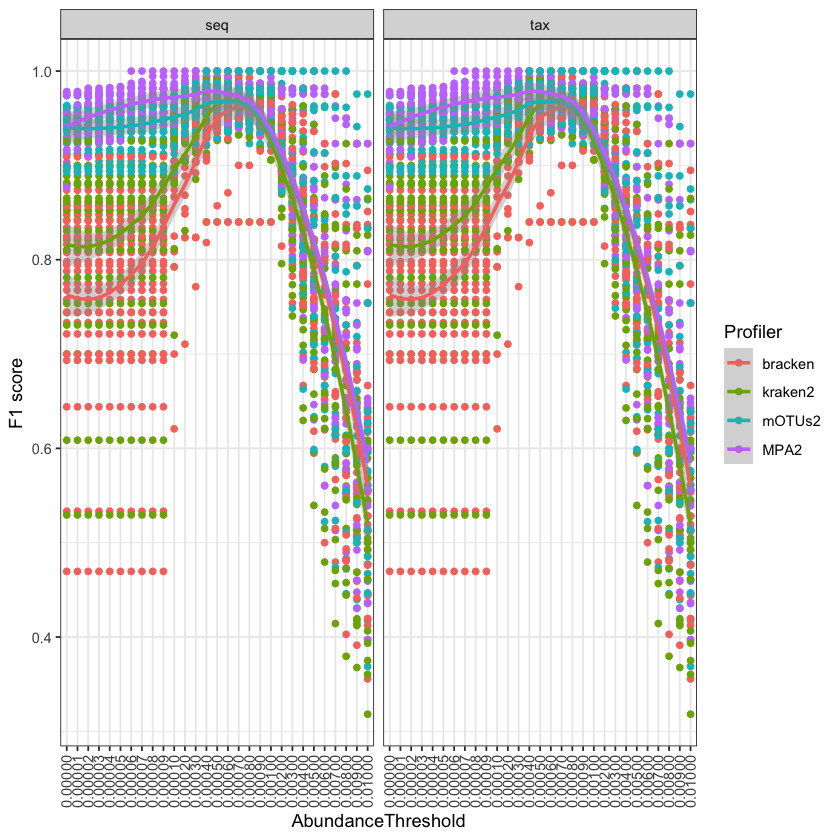

In [86]:
f1_plot <- d_u %>% filter(Metric=='f1') %>% 
ggplot(aes(x=AbundanceThreshold, y=value)) + 
geom_point(aes(color=Profiler)) + geom_smooth(aes(group=Profiler, color=Profiler)) + 
ylab("F1 score")+
#coord_flip()+
facet_wrap(~Type)+ theme_bw() + 
theme(axis.text.x = element_text(angle = 90, vjust = 0.5, hjust=1))
f1_plot
ggsave(filename="F1_VS_thresholds.pdf", plot=f1_plot, width=30, height=2)

In [79]:
sessionInfo()

R version 3.5.1 (2018-07-02)
Platform: x86_64-apple-darwin13.4.0 (64-bit)
Running under: macOS  10.14.6

Matrix products: default
BLAS/LAPACK: /Users/huangshi/anaconda3/envs/r-env-ggplot2/lib/R/lib/libRblas.dylib

locale:
[1] en_US.UTF-8/en_US.UTF-8/en_US.UTF-8/C/en_US.UTF-8/en_US.UTF-8

attached base packages:
[1] stats     graphics  grDevices utils     datasets  methods   base     

other attached packages:
[1] bindrcpp_0.2.2 dplyr_0.7.6    ggplot2_3.1.1  reshape2_1.4.3

loaded via a namespace (and not attached):
 [1] Rcpp_0.12.18     bindr_0.1.1      magrittr_1.5     tidyselect_0.2.4
 [5] munsell_0.5.0    uuid_0.1-2       colorspace_1.3-2 R6_2.2.2        
 [9] rlang_0.2.1      stringr_1.3.1    plyr_1.8.4       tools_3.5.1     
[13] grid_3.5.1       gtable_0.2.0     withr_2.1.2      htmltools_0.3.6 
[17] assertthat_0.2.0 lazyeval_0.2.1   digest_0.6.15    tibble_1.4.2    
[21] crayon_1.3.4     IRdisplay_0.5.0  purrr_0.2.5      repr_0.15.0     
[25] base64enc_0.1-3  IRkernel_0.8.12  gl